## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

### План действий:

1. [***Изучение данных***](#1)
    1. [Исключение столбцов с временем](#1.1)
2. [***Длительность времени между первым и последним замером температуры.***](#2)
    1. [Замена названия столбцов](#2.1)
    2. [Создание двух таблиц с последним и превым временм](#2.2)
    3. [Нахождение разницы во времени](#2.3)
    4. [Находим средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей.](#2.4)
    5. [Добавлем значение финальной и начальной температуры](#2.5)
3. [***Суммарное время нагрева электродами***](#3)
    1. [Замена названия столбцов](#3.1)
    2. [Замена типа данных в столбце с датами](#3.2)
    3. [Нахождение разницы во времени](#3.3)
    4. [Находим средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей.](#3.4)
    5. [Перевод времени в секунды](#3.5)
4. [***Количество запусков нагрева электродами***](#4)
    1. [Подсчет количество совпадающих ключей.](#4.1)
    2. [Находим средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей.](#4.2)
5. [***Среднее соотношение потребления активной и реактивной мощности***](#5)
    1. [Нахождение отношения активной к реактивной мощности.](#5.1)
    2. [Нахождение среднего](#5.2)
    3. [Находим средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей.](#5.3)
6. [***Финальная обработка перед обучением модели***](#6)
    1. [Удаление аномальных значений.](#6.1)
    2. [Замена пропусков ](#6.2)
    3. [Изучение корреляции признаков](#6.3)   
7. [***создание выборок и обучение моделей***](#7)
    1. [Разделение данных на 3 выборки (обучающею, валидную и тестовою)](#7.1)
    2. [Обучение моделей](#7.2)
    3. [Проверка результата на валидной выборке метрикой MAE которая нужна заказчику и  R2 чтобы избодать переобучения](#7.3)       4. [Проверка получившийся результат на тестовой выборке](#7.4)
8. [***Вывод***](#8)
    1. [Табличка с результатами](#8.1)
    2. [Вывод](#8.2)


<a name="1"></a>
### Изучение данных

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
display(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
display(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name="1.1"></a>
***data_bulk_time и data_wire_time- Этои столбцы мне кажется не нужным. Он только запутает модель.***

<a name="2"></a>
### Нахождение времени между первым и последним замером температуры. 

- Нужно что-бы избавиться от дат.

In [4]:
data_temp.isna().sum()

key                0
Время замера       0
Температура     2901
dtype: int64

***Есть пропусщенные значения в стобце Температура.Это таргет поэтому просто удаляем. Это не удачные процессы и заменить их нечем***

In [5]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


***Много пропущенных значений и типы данных в некоторых стобцах указаны не верно. Так же есть проблемы с названиями столбцов***

In [6]:
data_temp = data_temp.rename(columns = {'Время замера':'time', 'Температура': 'temp'}, inplace = False)

<a name="2.1"></a>
***Заменяю названия столбцов что-бы было удобней работать***

In [7]:
data_temp['time'] = pd.to_datetime(data_temp['time'], format='%Y-%m-%dT%H:%M:%S')

***Меняем тип данных так как это столбец с датами***

In [8]:
data_time = data_temp[['time', 'key']]

In [9]:

df_max = (data_time[data_time.groupby('key').time.transform('max') == data_time['time']]).reset_index(drop=True)
df_min = (data_time[data_time.groupby('key').time.transform('min') == data_time['time']]).reset_index(drop=True)
time_df = df_min.merge(df_max, on = 'key') 
time_df['fin_time'] = time_df['time_y'] - time_df['time_x']

***Ищем максимальное и минимальное время для каждого отдельного цикла. После вычесляем их разность.***

In [10]:
time_df

,time_x,key,time_y,fin_time
0,2019-05-03 11:16:18,1,2019-05-03 11:30:39,00:14:21
1,2019-05-03 11:37:27,2,2019-05-03 11:59:12,00:21:45
2,2019-05-03 12:13:17,3,2019-05-03 12:34:57,00:21:40
3,2019-05-03 12:52:57,4,2019-05-03 12:59:25,00:06:28
4,2019-05-03 13:23:19,5,2019-05-03 13:36:01,00:12:42
...,...,...,...,...
3211,2019-08-31 22:44:04,3237,2019-08-31 23:05:43,00:21:39
3212,2019-08-31 23:30:31,3238,2019-08-31 23:43:00,00:12:29
3213,2019-09-01 01:31:47,3239,2019-09-01 02:24:15,00:52:28
3214,2019-09-01 02:39:01,3240,2019-09-01 03:35:16,00:56:15


<a name="2.2"></a>
<a name="2.3"></a>
***Датафрейм с данными о первом и последнем замере температуры.***

In [11]:
time_df['first_to_last'] = time_df['fin_time'].astype('int') / 1000000000

In [12]:
time_df.tail(10) 

,time_x,key,time_y,fin_time,first_to_last
3206,2019-08-31 19:55:53,3232,2019-08-31 20:17:12,00:21:19,1279.0
3207,2019-08-31 20:24:14,3233,2019-08-31 20:47:24,00:23:10,1390.0
3208,2019-08-31 20:54:17,3234,2019-08-31 21:15:28,00:21:11,1271.0
3209,2019-08-31 21:31:47,3235,2019-08-31 22:00:25,00:28:38,1718.0
3210,2019-08-31 22:08:13,3236,2019-08-31 22:31:42,00:23:29,1409.0
3211,2019-08-31 22:44:04,3237,2019-08-31 23:05:43,00:21:39,1299.0
3212,2019-08-31 23:30:31,3238,2019-08-31 23:43:00,00:12:29,749.0
3213,2019-09-01 01:31:47,3239,2019-09-01 02:24:15,00:52:28,3148.0
3214,2019-09-01 02:39:01,3240,2019-09-01 03:35:16,00:56:15,3375.0
3215,2019-09-01 04:03:30,3241,2019-09-01 04:38:08,00:34:38,2078.0


In [13]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 5 columns):
time_x           3216 non-null datetime64[ns]
key              3216 non-null int64
time_y           3216 non-null datetime64[ns]
fin_time         3216 non-null timedelta64[ns]
first_to_last    3216 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), timedelta64[ns](1)
memory usage: 150.8 KB


Text(0.5, 1.0, 'Какое самое частое время измерения')

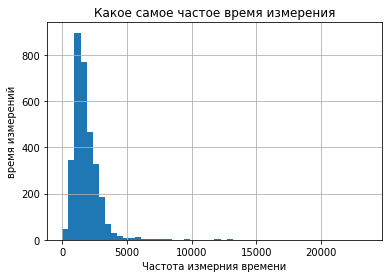

In [14]:
time_df['first_to_last'].hist(bins=50)

plt.xlabel('Частота измерния времени')
plt.ylabel('время измерений')
plt.title('Какое самое частое время измерения')

In [15]:
print('Средние-', time_df['first_to_last'].mean(),'\n')
print('Минимальные-', time_df['first_to_last'].min(),'\n')
print('Максимальные значения-', time_df['first_to_last'].max(),'\n')
print('Медиана-', time_df['first_to_last'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(time_df['first_to_last'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 1839.8616293532339 

Минимальные- 0.0 

Максимальные значения- 23537.0 

Медиана- 1581.0 

Величины 25%- и 75%-квартилей:
0.25     1177.0
0.50     1581.0
0.75     2235.0
1.00    23537.0
Name: first_to_last, dtype: float64


<a name="2.4"></a>
<a name="2.5"></a>
- Можно сделать вывод, что в среднем время обработки стали это 25 - 30 минуты. 
- Хотя есть и нулевые значения. Мне кажется это выбросы. 
- Так же есть цикл обработки который длиться почти 7 часов.

In [16]:
time_df = time_df.drop(['fin_time'], axis=1)
time_df = time_df.rename(columns = {'time_y':'time'}, inplace = False)

In [17]:
time_df = time_df.merge(data_temp, on = 'time') 
time_df = time_df.drop(['key_y', 'time'] , axis=1)
time_df = time_df.rename(columns = {'key_x':'key', 'time_x':'time', 'temp':'temp_fin'}, inplace = False)
time_df = time_df.merge(data_temp, on = 'time') 
time_df = time_df.drop(['key_y', 'time'] , axis=1)
time_df = time_df.rename(columns = {'key_x':'key', 'temp':'temp_start'}, inplace = False)
time_df.dropna(inplace = True)
time_df

,key,first_to_last,temp_fin,temp_start
0,1,861.0,1613.0,1571.0
1,2,1305.0,1602.0,1581.0
2,3,1300.0,1599.0,1596.0
3,4,388.0,1625.0,1601.0
4,5,762.0,1602.0,1576.0
...,...,...,...,...
2472,2495,1137.0,1591.0,1570.0
2473,2496,1618.0,1591.0,1554.0
2474,2497,717.0,1589.0,1571.0
2475,2498,1302.0,1594.0,1591.0


<a name="3"></a>
### Суммарное время нагрева электродами

- Так же нужно для того что-бы убрать даты.

In [18]:
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


In [19]:
data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

In [20]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


<a name="3.1"></a>
<a name="3.2"></a>
***Пропусков нет, но значения столбцов надо поменять.***

In [21]:
data_arc = data_arc.rename(columns = {'Начало нагрева дугой':'arc_heating_start', 'Конец нагрева дугой': 'arc_heating_end',
                                        'Активная мощность': 'active_power', 'Реактивная мощность': 'reactive_power'}, inplace = False)

In [22]:
data_arc['reactive_power'][data_arc['reactive_power'] <= 0] = data_arc['reactive_power'][data_arc['reactive_power'] <= 0] * -1

***Заменяем отрицательное значение на положительные. Мне кажется это просто ошибка в данных.***

In [23]:
data_arc['arc_heating_start'] = pd.to_datetime(data_arc['arc_heating_start'], format='%Y-%m-%dT%H:%M:%S')
data_arc['arc_heating_end'] = pd.to_datetime(data_arc['arc_heating_end'], format='%Y-%m-%dT%H:%M:%S')

***Меняем тип данных***

In [24]:
data_arc['time_difference'] = data_arc['arc_heating_end'] - data_arc['arc_heating_start']
df_sum = data_arc.groupby(by=("key"))["time_difference"].sum()

In [25]:
df_sum = df_sum.to_frame()
df_sum['sum_electo_time'] = df_sum['time_difference'].astype('int') / 1000000000

Text(0.5, 1.0, 'Какое самое частое cуммарное время нагрева электродами')

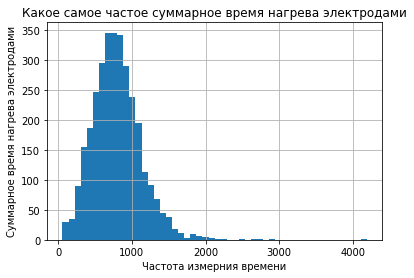

In [26]:
df_sum['sum_electo_time'].hist(bins=50)

plt.xlabel('Частота измерния времени')
plt.ylabel('Суммарное время нагрева электродами')
plt.title('Какое самое частое cуммарное время нагрева электродами')

In [27]:
print('Средние-', df_sum['sum_electo_time'].mean(),'\n')
print('Минимальные-', df_sum['sum_electo_time'].min(),'\n')
print('Максимальные значения-', df_sum['sum_electo_time'].max(),'\n')
print('Медиана-', df_sum['sum_electo_time'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(df_sum['sum_electo_time'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 794.5790292470442 

Минимальные- 57.0 

Максимальные значения- 4189.0 

Медиана- 770.0 

Величины 25%- и 75%-квартилей:
0.25     571.0
0.50     770.0
0.75     983.0
1.00    4189.0
Name: sum_electo_time, dtype: float64


<a name="3.3"></a>
<a name="3.4"></a>
<a name="3.5"></a>
- Среднее суммарное время нагрева электродами 13 минут.
- Максимальное это 68 минут. Думаю это не нормально, и это точно выброс. 

In [28]:
df_sum = df_sum.drop(['time_difference'], axis=1)

In [29]:
df_sum

,sum_electo_time
key,
1,1098.0
2,811.0
3,655.0
4,741.0
5,869.0
...,...
3237,909.0
3238,546.0
3239,1216.0


In [30]:
data = time_df.merge(df_sum, on = 'key') 
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time
0,1,861.0,1613.0,1571.0,1098.0
1,2,1305.0,1602.0,1581.0,811.0
2,3,1300.0,1599.0,1596.0,655.0
3,4,388.0,1625.0,1601.0,741.0
4,5,762.0,1602.0,1576.0,869.0
...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0
2471,2496,1618.0,1591.0,1554.0,940.0
2472,2497,717.0,1589.0,1571.0,569.0
2473,2498,1302.0,1594.0,1591.0,750.0


***Соеденяем 2 таблицы***

<a name="4"></a>
### Количество запусков нагрева электродами.

- Дополнительная фича

In [31]:
data_arc

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,time_difference
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,00:02:37
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,00:03:00
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,00:03:04
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,00:00:57


In [32]:
df_count = data_arc.groupby(by=("key"))["key"].count()
df_count = df_count.to_frame('amount')
df_count

,amount
key,
1,5
2,4
3,5
4,4
5,4
...,...
3237,5
3238,3
3239,8


Text(0.5, 1.0, 'количество запусков к частоте запусков')

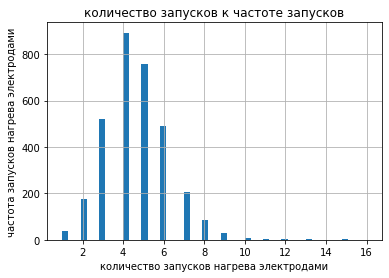

In [33]:
df_count['amount'].hist(bins=50)

plt.xlabel('количество запусков нагрева электродами')
plt.ylabel('частота запусков нагрева электродами')
plt.title('количество запусков к частоте запусков')

In [34]:
print('Средние-', df_count['amount'].mean(),'\n')
print('Минимальные-', df_count['amount'].min(),'\n')
print('Максимальные значения-', df_count['amount'].max(),'\n')
print('Медиана-', df_count['amount'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(df_count['amount'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 4.628500311138768 

Минимальные- 1 

Максимальные значения- 16 

Медиана- 4.0 

Величины 25%- и 75%-квартилей:
0.25     4.0
0.50     4.0
0.75     6.0
1.00    16.0
Name: amount, dtype: float64


<a name="4.1"></a>
<a name="4.2"></a>
- В среднем количество запусков 4 на один цикл
- Тут есть выбросы в виде 14 раз. Это или ошибка в занесенных данных или что-то случилось на заводе.

In [35]:
data = data.merge(df_count, on = 'key') 
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time,amount
0,1,861.0,1613.0,1571.0,1098.0,5
1,2,1305.0,1602.0,1581.0,811.0,4
2,3,1300.0,1599.0,1596.0,655.0,5
3,4,388.0,1625.0,1601.0,741.0,4
4,5,762.0,1602.0,1576.0,869.0,4
...,...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0,4
2471,2496,1618.0,1591.0,1554.0,940.0,6
2472,2497,717.0,1589.0,1571.0,569.0,3
2473,2498,1302.0,1594.0,1591.0,750.0,5


<a name="5"></a>
### Среднее соотношение потребления активной и реактивной мощности.

- Нужно для того чтобы убрать кореляцию этих признаков.

In [36]:
data_arc

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,time_difference
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,00:02:37
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,00:03:00
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,00:03:04
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,00:00:57


In [37]:
data_arc['active_reactive_avg'] = data_arc['active_power'] / data_arc['reactive_power']
data_arc

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,time_difference,active_reactive_avg
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28,1.671717
...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,00:02:37,1.505675
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,00:03:00,1.292139
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,00:03:04,1.542928
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,00:00:57,1.514004


In [38]:
df_avg = data_arc[['key', 'active_reactive_avg']]
df_avg

,key,active_reactive_avg
0,1,1.420582
1,1,1.548395
2,1,1.492292
3,1,1.561504
4,1,1.671717
...,...,...
14871,3241,1.505675
14872,3241,1.292139
14873,3241,1.542928
14874,3241,1.514004


In [39]:
df_avg = df_avg.groupby(['key']).mean()

Text(0.5, 1.0, 'соотношение потребления активной и реактивной мощности')

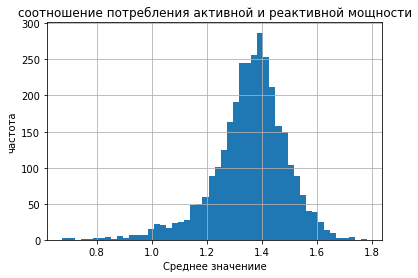

In [40]:
df_avg['active_reactive_avg'].hist(bins=50)

plt.xlabel('Среднее значениие')
plt.ylabel('частота')
plt.title('соотношение потребления активной и реактивной мощности')

In [41]:
print('Средние-', df_avg['active_reactive_avg'].mean(),'\n')
print('Минимальные-', df_avg['active_reactive_avg'].min(),'\n')
print('Максимальные значения-', df_avg['active_reactive_avg'].max(),'\n')
print('Медиана-', df_avg['active_reactive_avg'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(df_avg['active_reactive_avg'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 1.357451946823148 

Минимальные- 0.6761056039759106 

Максимальные значения- 1.7821643754955452 

Медиана- 1.370550312324632 

Величины 25%- и 75%-квартилей:
0.25    1.292892
0.50    1.370550
0.75    1.438292
1.00    1.782164
Name: active_reactive_avg, dtype: float64


<a name="5.1"></a>
<a name="5.2"></a>
<a name="5.3"></a>
- ***Я не заметил тут анамалий. Думаю что тут исключать ничего не надо.***

In [42]:
data = data.merge(df_avg, on = 'key') 
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time,amount,active_reactive_avg
0,1,861.0,1613.0,1571.0,1098.0,5,1.538898
1,2,1305.0,1602.0,1581.0,811.0,4,1.551834
2,3,1300.0,1599.0,1596.0,655.0,5,1.583120
3,4,388.0,1625.0,1601.0,741.0,4,1.563487
4,5,762.0,1602.0,1576.0,869.0,4,1.480428
...,...,...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0,4,1.372734
2471,2496,1618.0,1591.0,1554.0,940.0,6,1.491059
2472,2497,717.0,1589.0,1571.0,569.0,3,1.192036
2473,2498,1302.0,1594.0,1591.0,750.0,5,1.470072


<a name="6"></a>
### Финальная обработка перед обучением модели.

In [43]:
data = data.query('500 <= first_to_last <= 4000')
data = data.query('0 <= sum_electo_time <= 1750')
data = data.query('2 <= amount <= 8')
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time,amount,active_reactive_avg
0,1,861.0,1613.0,1571.0,1098.0,5,1.538898
1,2,1305.0,1602.0,1581.0,811.0,4,1.551834
2,3,1300.0,1599.0,1596.0,655.0,5,1.583120
4,5,762.0,1602.0,1576.0,869.0,4,1.480428
5,6,1385.0,1596.0,1543.0,952.0,4,1.501854
...,...,...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0,4,1.372734
2471,2496,1618.0,1591.0,1554.0,940.0,6,1.491059
2472,2497,717.0,1589.0,1571.0,569.0,3,1.192036
2473,2498,1302.0,1594.0,1591.0,750.0,5,1.470072


In [44]:
data_wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Сумма всех добавлений металлов и примесей

In [45]:
data_wire = data_wire.fillna(value=0)
data_wire['wire_sum'] = data_wire['Wire 1'] + data_wire['Wire 2'] + data_wire['Wire 3'] + data_wire['Wire 4'] + data_wire['Wire 6'] + data_wire['Wire 9'] + data_wire['Wire 8']
data_bulk = data_bulk.fillna(value=0)
data_bulk['bulk_sum'] = data_bulk['Bulk 1'] + data_bulk['Bulk 2'] + data_bulk['Bulk 3'] + data_bulk['Bulk 4'] + data_bulk['Bulk 5'] + data_bulk['Bulk 6'] + data_bulk['Bulk 7'] + data_bulk['Bulk 8'] + data_bulk['Bulk 9'] + data_bulk['Bulk 10'] + data_bulk['Bulk 11'] + data_bulk['Bulk 12'] + data_bulk['Bulk 13'] + data_bulk['Bulk 14'] + data_bulk['Bulk 15']

***Теперь можно удалить аномальные значения***
<a name="6.1"></a>

In [46]:
data_wire =  data_wire.drop(['Wire 5', 'Wire 7', 'Wire 8'] , axis=1)
data_bulk =  data_bulk.drop(['Bulk 2', 'Bulk 8'] , axis=1)
data.dropna(inplace = True)
data_bulk

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,bulk_sum
0,1,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0,758.0
3125,3238,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0,594.0
3126,3239,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0,630.0
3127,3240,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,54.0,272.0


- В столбца `Wire 5`, `Wire 7` кореляция 0


<a name="6.3"></a>
***Заменяю значения на 0 так-как Nan это значит, что ничего не добавили***

In [47]:
data = data.merge(data_gas, on = 'key') 
data = data.rename(columns = {'Газ 1':'gas'}, inplace = False)
data = data.merge(data_bulk, on = 'key') 
data = data.merge(data_wire, on = 'key')

- `stop_time` — Время на котором закончился процесс;
- `first_to_last` — Времени прошло с начала до конца процесса;
- `sum_electo_time` — Суммарное время нагрева электродами;
- `amount` — Количество запусков нагрева электродами;
- `active_reactive_avg` — Среднее соотношение потребления активной и реактивной мощности;

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 0 to 2193
Data columns (total 29 columns):
key                    2194 non-null int64
first_to_last          2194 non-null float64
temp_fin               2194 non-null float64
temp_start             2194 non-null float64
sum_electo_time        2194 non-null float64
amount                 2194 non-null int64
active_reactive_avg    2194 non-null float64
gas                    2194 non-null float64
Bulk 1                 2194 non-null float64
Bulk 3                 2194 non-null float64
Bulk 4                 2194 non-null float64
Bulk 5                 2194 non-null float64
Bulk 6                 2194 non-null float64
Bulk 7                 2194 non-null float64
Bulk 9                 2194 non-null float64
Bulk 10                2194 non-null float64
Bulk 11                2194 non-null float64
Bulk 12                2194 non-null float64
Bulk 13                2194 non-null float64
Bulk 14                2194 non-null float

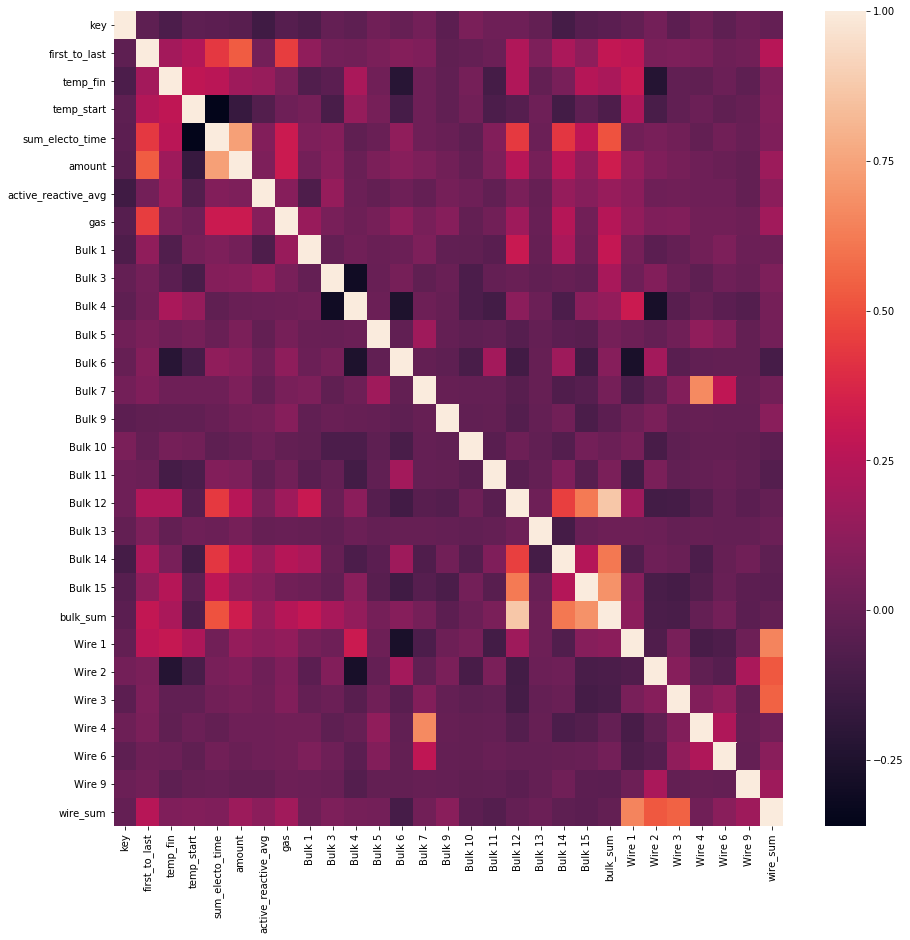

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data.corr())

In [50]:
c = data.corr()['temp_fin'].abs()
so = c.sort_values(kind='quicksort')
print(so)

Wire 6                 0.011704
Bulk 13                0.011855
Wire 3                 0.016453
Bulk 9                 0.019497
Wire 4                 0.022499
Bulk 7                 0.024789
Wire 9                 0.028477
Bulk 5                 0.031715
Bulk 3                 0.041345
Bulk 10                0.044996
Bulk 14                0.054074
gas                    0.065169
Bulk 1                 0.068566
wire_sum               0.077671
key                    0.089350
Bulk 11                0.111222
active_reactive_avg    0.154309
amount                 0.170998
first_to_last          0.187804
bulk_sum               0.211055
Bulk 4                 0.211215
Bulk 6                 0.213240
Wire 2                 0.224619
Bulk 12                0.233178
Bulk 15                0.245695
sum_electo_time        0.265023
temp_start             0.281677
Wire 1                 0.300540
temp_fin               1.000000
Name: temp_fin, dtype: float64


<a name="6.4"></a>
***Признаки сильно не крелируют, что хорошо для обучения.***

In [51]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so.head(30))


active_reactive_avg  Bulk 13                0.000132
Bulk 13              active_reactive_avg    0.000132
                     Bulk 6                 0.000278
Bulk 6               Bulk 13                0.000278
Bulk 9               Bulk 4                 0.000678
Bulk 4               Bulk 9                 0.000678
Bulk 6               key                    0.001177
key                  Bulk 6                 0.001177
temp_start           Wire 9                 0.001217
Wire 9               temp_start             0.001217
Bulk 15              Bulk 13                0.001533
Bulk 13              Bulk 15                0.001533
Bulk 5               Bulk 3                 0.002211
Bulk 3               Bulk 5                 0.002211
Bulk 14              Bulk 3                 0.002479
Bulk 3               Bulk 14                0.002479
Wire 9               Bulk 3                 0.002560
Bulk 3               Wire 9                 0.002560
Bulk 7               Bulk 13                0.

<a name="7"></a>
<a name="7.1"></a>
***Создаем Выборки***

In [52]:
train, valid, test = np.split(data.sample(frac=1, random_state=12345),
                                 [int(.6*len(data)), int(.8*len(data))])

# переменные для признаков и целевого признака
features_train = train.drop(['temp_fin'], axis=1)
target_train = train['temp_fin']

features_valid = valid.drop(['temp_fin'], axis=1)
target_valid = valid['temp_fin'] 

features_test = test.drop(['temp_fin'], axis=1)
target_test = test['temp_fin']
print(train.shape)
print(valid.shape)
print(test.shape)

(1316, 29)
(439, 29)
(439, 29)


<a name="7.2"></a>
### Обучение моделей

In [53]:
%%time
model = LinearRegression()
model.fit(features_train, target_train) 

predictions_train = model.predict(features_train)
predictions_valid = model.predict(features_valid)


print("Наилучшая модель")
print("MAE на обучающей выборке: ", mean_absolute_error(target_train, predictions_train)) 
print("MAE на валидационной выборке: ", mean_absolute_error(target_valid, predictions_valid))
print("R2 =", r2_score(target_valid, predictions_valid))


Наилучшая модель
MAE на обучающей выборке:  5.936655859951422
MAE на валидационной выборке:  5.892593150073126
R2 = 0.43895329928130633
CPU times: user 29.7 ms, sys: 48.6 ms, total: 78.3 ms
Wall time: 55 ms


In [54]:
%%time

model1 = CatBoostRegressor(loss_function = 'MAE', iterations=200, learning_rate=0.05, depth = 14, random_state=12345)
# Fit model
model1.fit(features_train, target_train, verbose=10) 

predictions_train1 = model1.predict(features_train)
predictions_valid1 = model1.predict(features_valid)

print("Наилучшая модель")
print("MAE на обучающей выборке: ", mean_absolute_error(target_train, predictions_train1)) 
print("MAE на валидационной выборке: ", mean_absolute_error(target_valid, predictions_valid1))
print("R2 =", r2_score(target_valid, predictions_valid1))


0:	learn: 7.2955537	total: 2.97s	remaining: 9m 50s
100:	learn: 0.7115003	total: 3m	remaining: 2m 57s
199:	learn: 0.1795606	total: 5m 53s	remaining: 0us
Наилучшая модель
MAE на обучающей выборке:  0.17956159732157478
MAE на валидационной выборке:  6.640069986501532
R2 = 0.2725038908466686
CPU times: user 5min 33s, sys: 9.61 s, total: 5min 43s
Wall time: 5min 56s


In [55]:
%%time
train=lgb.Dataset(features_train, label=target_train)

params={}
params['learning_rate']=0.05
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression'#regression task
params['n_estimators']=200
params['max_depth']= 14
params['random_state']=12345

model2=lgb.train(params,train,  100)


predictions_train2 = model2.predict(features_train)
predictions_valid2 = model2.predict(features_valid)

print("Наилучшая модель")
print("MAE на обучающей выборке: ", mean_absolute_error(target_train, predictions_train2)) 
print("MAE на валидационной выборке: ", mean_absolute_error(target_valid, predictions_valid2))
print("R2 =", r2_score(target_valid, predictions_valid2))


Наилучшая модель
MAE на обучающей выборке:  1.8274907129072515
MAE на валидационной выборке:  5.424768759410761
R2 = 0.5175511876531785
CPU times: user 14.4 s, sys: 149 ms, total: 14.5 s
Wall time: 14.7 s


In [56]:
%%time
model3 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate =0.05,
                max_depth =14, alpha = 100, n_estimators = 200,  random_state=12345)

model3.fit(features_train, target_train)


predictions_train3 = model3.predict(features_train)
predictions_valid3 = model3.predict(features_valid)


print("Наилучшая модель")
print("MAE на обучающей выборке: ", mean_absolute_error(target_train, predictions_train3)) 
print("MAE на валидационной выборке: ", mean_absolute_error(target_valid, predictions_valid3))
print("R2 =", r2_score(target_valid, predictions_valid3))

[08:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Наилучшая модель
MAE на обучающей выборке:  0.3121848990489647
MAE на валидационной выборке:  5.678809372330581
R2 = 0.4710101009886444
CPU times: user 1.53 s, sys: 11.9 ms, total: 1.55 s
Wall time: 1.72 s


In [57]:
%%time

model4 = RandomForestRegressor(n_estimators=200, max_depth =14, random_state=12345)
model4.fit(features_train, target_train) 
        
predictions_train4 = model4.predict(features_train)
predictions_valid4 = model4.predict(features_valid)


print("Наилучшая модель")
print("MAE на обучающей выборке: ", mean_absolute_error(target_train, predictions_train4)) 
print("MAE на валидационной выборке: ", mean_absolute_error(target_valid, predictions_valid4))
print("R2 =", r2_score(target_valid, predictions_valid4))


Наилучшая модель
MAE на обучающей выборке:  2.4223259251974603
MAE на валидационной выборке:  5.589625588099341
R2 = 0.4752785261923027
CPU times: user 2.89 s, sys: 36.2 ms, total: 2.93 s
Wall time: 2.94 s


<a name="7.3"></a>
- Все модели проверил на R2. Что бы не переобучить.

### Проверка моделей

In [58]:
%%time
print('LinearRegression')
predictions_test = model.predict(features_test)
print("MAE на тестовой выборке: ", mean_absolute_error(target_test, predictions_test))
print("R2 =", r2_score(target_test, predictions_test))

LinearRegression
MAE на тестовой выборке:  6.556837513340596
R2 = 0.396445167852553
CPU times: user 13.2 ms, sys: 16 ms, total: 29.2 ms
Wall time: 5.75 ms


In [59]:
%%time
print('CatBoost')
predictions_test1 = model1.predict(features_test)
print("MAE на тестовой выборке: ", mean_absolute_error(target_test, predictions_test1))
print("R2 =", r2_score(target_test, predictions_test1))

CatBoost
MAE на тестовой выборке:  7.057999921628596
R2 = 0.30494697944355187
CPU times: user 27.9 ms, sys: 55 ms, total: 82.9 ms
Wall time: 110 ms


In [60]:
%%time
print('XGBoost')
predictions_test2 = model2.predict(features_test)
print("MAE на тестовой выборке: ", mean_absolute_error(target_test, predictions_test2))
print("R2 =", r2_score(target_test, predictions_test2))

XGBoost
MAE на тестовой выборке:  5.684452851850815
R2 = 0.5353564909677826
CPU times: user 31 ms, sys: 89 µs, total: 31 ms
Wall time: 27.9 ms


In [61]:
%%time
print('LightGBM')
predictions_test3 = model3.predict(features_test)
print("MAE на тестовой выборке: ", mean_absolute_error(target_test, predictions_test3))
print("R2 =", r2_score(target_test, predictions_test3))

LightGBM
MAE на тестовой выборке:  5.824478184172124
R2 = 0.4867009941769237
CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 50.3 ms


In [62]:
%%time
print('RandomForestRegressor')
predictions_test4 = model4.predict(features_test)
print("MAE на тестовой выборке: ", mean_absolute_error(target_test, predictions_test4))
print("R2 =", r2_score(target_test, predictions_test4))

RandomForestRegressor
MAE на тестовой выборке:  5.917670475046302
R2 = 0.4971375887920243
CPU times: user 48.4 ms, sys: 16 µs, total: 48.4 ms
Wall time: 46.3 ms


In [63]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

<a name="7.4"></a>
***графики важности факторов***
- Важными факторы для модели явлюятся стартовая темпреатура и сколько раз опускали электроды.

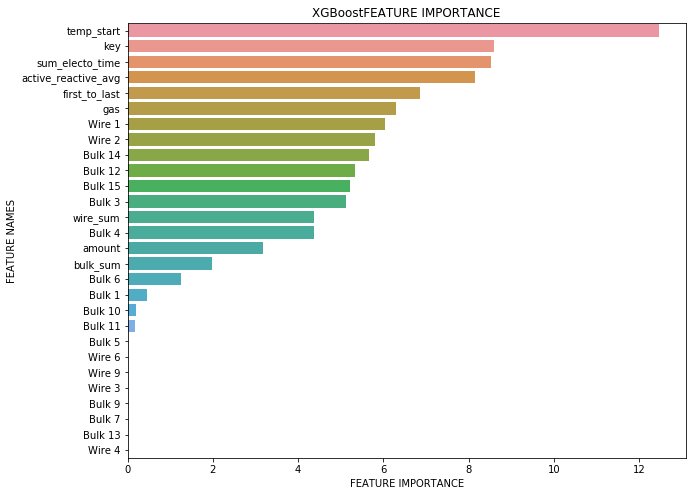

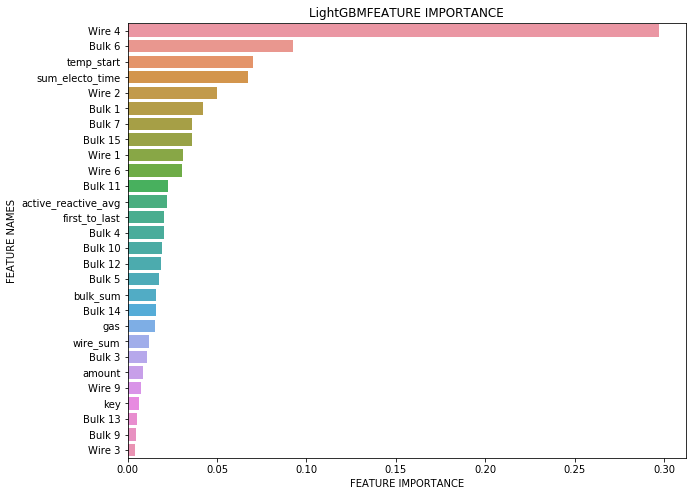

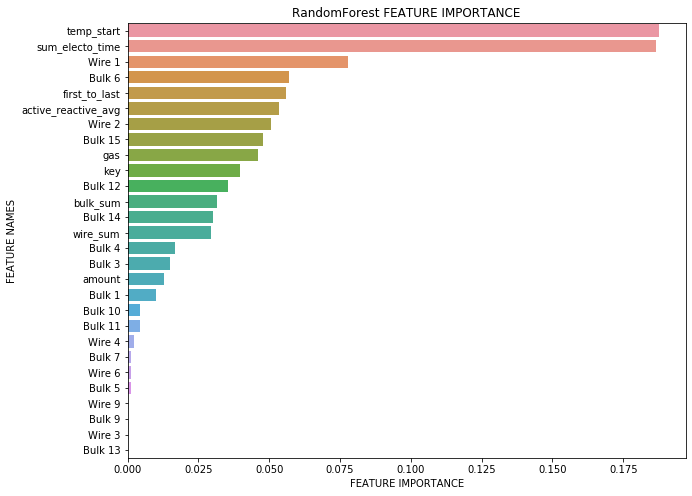

In [64]:
plot_feature_importance(model1.feature_importances_,features_train.columns,'XGBoost')
plot_feature_importance(model3.feature_importances_,features_train.columns,'LightGBM')
plot_feature_importance(model4.feature_importances_,features_train.columns,'RandomForest ')

### Вывод:

<a name="8"></a>
<a name="8.1"></a>

| Params/Model  | LinearRegression   | CatBoost | XGBoost | LightGBM | RandomForest |
| :------------- | :-------------: |:-------------: |:-------------: |:-------------: |:-------------: |
| Время Обучения  | 342 ms  | 5min 53s  | 640 ms | 1.5 s| 2.96 s|
| Время выполнения     | 2.58 ms    |2.08 ms  | 2.54 ms | 2.28 ms | 2.32 ms |
| |  | | | | |
| Качество на обучающей выборке (MSE)  | 5.88    |6.26  | 5.42 | 5.68 | 5.6|
| Качество на тестовой выборке (MSE)  | 6.55    |6.70  | 5.68 | 5.82 | 5.91|
| |  | | | | |
| Качество на обучающей выборке (R2)  | 0.44    |0.34  | 0.52 | 0.47 | 0.45|
| Качество на тестовой выборке (R2)  | 0.34    |0.37  | 0.53 | 0.48 | 0.5|

<a name="8.2"></a>
         
***Заказчик хотел метрику что бы метрика MAE была меньше 6. У меня получилось этого добиться в 3х моделях***
- LinearRegression model: Медленная и не с самым лучшим результатом. Я бы ее не рекомендовал.
- CatBoost model: Самая быстрая, но дого обучается. Результат получился хуже, чем у весех. Могу рекомендовать эту модель только если скорость на много важнее результата.
- XGBoost model: Результат лучший MSE на тестовой выборке `5.68`, выполняется она долго. Это единственный минус.
- LightGBM model: результат очень хороший `5.82`. Если сравнивать со всеми, то эта модель оптимальная с точки зрения скорости и результата.
- RandomForest model: результат на грани с приемлемым `5.91`. Скорость выполнения средняя. Я бы сказал, что это модель тоже можно использовать.


***LightGBM model***:
- модель оптимальная с точки зрения скорости и результата.